In [1]:
import importlib
import numpy as np
import random
import cv2
from PIL import Image
from IPython.display import display

import shapedata
importlib.reload(shapedata)

<module 'shapedata' from '/home/yegor/Projects/interactive-intelligence/emergent-lang/shapedata.py'>

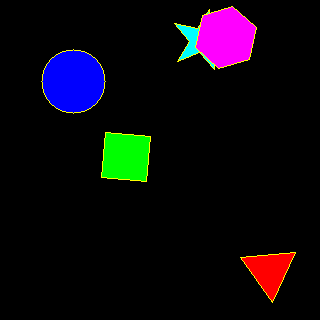

In [2]:
images = np.zeros((8, 320, 320, 3), np.uint8)

shapedata.draw_shapes(images[0], [
    shapedata.Shape('triangle', (255, 0, 0)),
    shapedata.Shape('square', (0, 255, 0)),
    shapedata.Shape('circle', (0, 0, 255)),
    shapedata.Shape('star', (0, 255, 255)),
    shapedata.Shape('hexagon', (255, 0, 255)),
], outline=(255,255,0))

Image.fromarray(images[0])

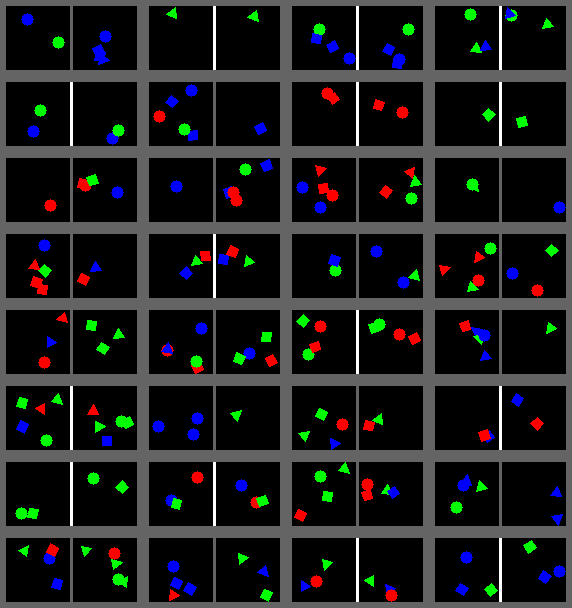

In [3]:
data = shapedata.ShapeData(256, 64)
shapedata.demo_dataset(data, shape=(8,4))

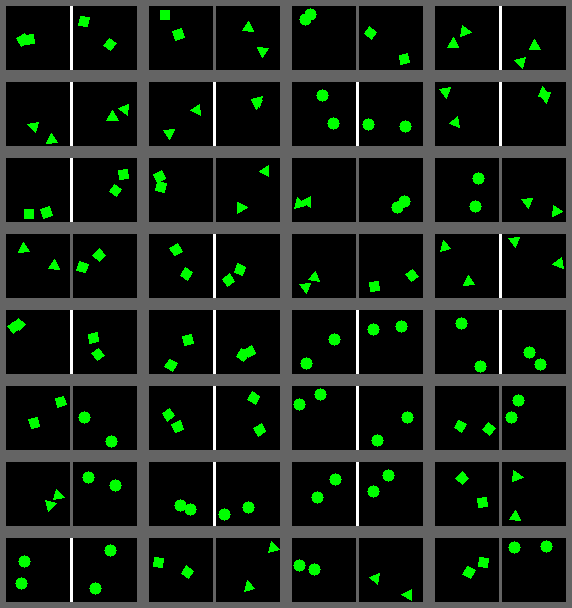

In [4]:
data = shapedata.ExcludeShapeData(
    256, 64,
    exclude_shapes={ # exclude non-green shapes
        shapedata.Shape('triangle', (255, 0, 0)),
        shapedata.Shape('circle', (255, 0, 0)),
        shapedata.Shape('square', (255, 0, 0)),
        shapedata.Shape('triangle', (0, 0, 255)),
        shapedata.Shape('circle', (0, 0, 255)),
        shapedata.Shape('square', (0, 0, 255)),
    },
    exclude_lists=[ # exclude mismatched combinations of shapes
        [shapedata.Shape('circle', (0, 255, 0)),
         shapedata.Shape('square', (0, 255, 0)),],
        [shapedata.Shape('triangle', (0, 255, 0)),
        shapedata.Shape('square', (0, 255, 0)),],
        [shapedata.Shape('triangle', (0, 255, 0)),
        shapedata.Shape('circle', (0, 255, 0)),],
    ],
    min_shapes=2, max_shapes=2,
)
shapedata.demo_dataset(data, shape=(8,4))

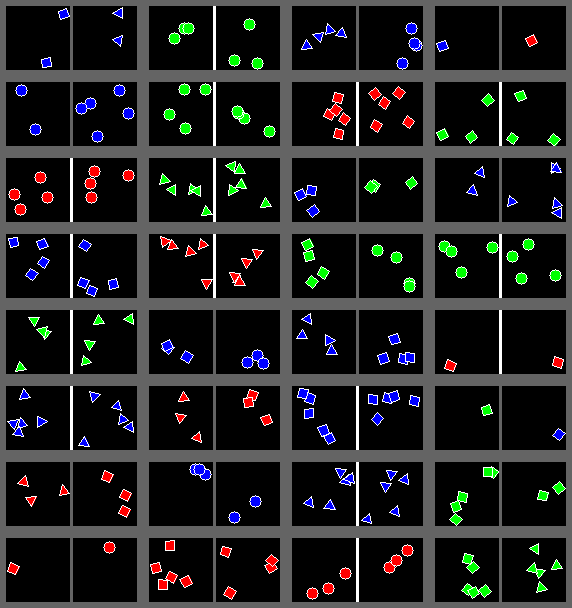

In [5]:
data = shapedata.AlecModeShapeData(
    256, 64, outline=(255,255,255), strong=True)
(x1, x1_shapes), (x2, x2_shapes), y = data.create_batch()
shapedata.demo_dataset(data, shape=(8,4))

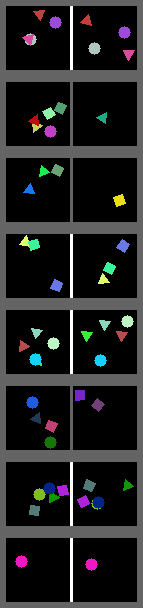

In [6]:
data = shapedata.ShapeData(256, 64, shape_colors=shapedata.pick_random_color)
(x1, x1_shapes), (x2, x2_shapes), y = data.create_batch()
shapedata.demo_dataset(data, shape=(8,1))

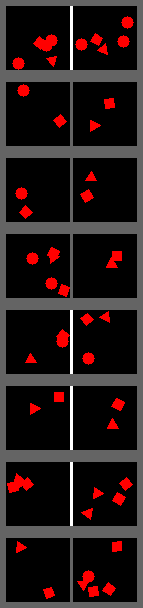

In [7]:
data = shapedata.ShapeData(256, 64, shape_colors=[(255, 0, 0)],
                           min_shapes=1, max_shapes=5)
(x1, x1_shapes), (x2, x2_shapes), y = data.create_batch()

shapedata.demo_dataset(data, shape=(8,1))